In [1]:
import geopandas as gpd
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from imgw_api import get_hydro_metadata,get_meteo_metadata
import numpy as np

In [2]:
def get_map_wojewodztwa():
    return gpd.read_file("../static_data/wojewodztwa")

In [3]:
def get_map_rzeki():
    return gpd.read_file("../static_data/Rzeki").to_crs("EPSG:2180")

In [4]:
# Data 2010 - 2023
h_data = pd.read_parquet("../static_data/hydro_data.parquet.gzip")
m_data = pd.read_parquet("../static_data/meteo_data.parquet.gzip")

In [5]:
gdf_h = get_hydro_metadata()
gdf_m = get_meteo_metadata()
woj = get_map_wojewodztwa()
rzeki = get_map_rzeki()
# Clip rivers to voivodeship boundary
rzeki = gpd.clip(rzeki, woj)

In [18]:
gdf_m

,Station Code,Station Name,Lon,Lat,geometry
0,252210290,RYBIENKO,21.429167,52.577778,POINT (664545.901 526326.119)
1,351230497,WŁODAWA,23.529444,51.553333,POINT (813865.629 419371.773)
2,352220385,SIEDLCE,22.244722,52.181111,POINT (721755.946 484409.713)
3,250240010,STRZYŻÓW,24.035556,50.840000,POINT (854357.945 342430.384)
4,352230399,TERESPOL,23.621944,52.078611,POINT (816563.802 478131.955)
...,...,...,...,...,...
758,250190850,TROKS,19.635833,50.303889,POINT (545266.654 270940.231)
759,252140070,BOLESZKOWICE,14.566667,52.726944,POINT (200773.192 549362.851)
760,252190240,TRĘBKI,19.540556,52.320278,POINT (536832.852 495059.236)
761,251190150,DOBRYSZYCE,19.428333,51.138889,POINT (529957.081 363656.987)


In [20]:
print("All hydro stations:", len(gdf_h['Station Code'].unique()), "\nAll meteo stations:", len(gdf_m['Station Code'].unique()))

All hydro stations: 859 
All meteo stations: 763


In [24]:
h_intersect = set(np.intersect1d(h_data['Station Code'], gdf_h['Station Code']))
m_intersect = set(np.intersect1d(m_data['Station Code'], gdf_m['Station Code']))

In [28]:
gdf_h = gdf_h[gdf_h['Station Code'].isin(h_intersect)]
gdf_m = gdf_m[gdf_m['Station Code'].isin(m_intersect)]

In [32]:
print("Hydro stations in 2010 - 2023 data:", len(gdf_h['Station Code'].unique()))
print("Meteo stations in 2010 - 2023 data:", len(gdf_m['Station Code'].unique()))

Hydro stations in 2010 - 2023 data: 749
Meteo stations in 2010 - 2023 data: 59


/var/folders/z9/f473nv411j13cywwsnc_vt580000gn/T/ipykernel_18672/1016407429.py:30: UserWarning: Legend does not support handles for PatchCollection instances.
See: https://matplotlib.org/stable/tutorials/intermediate/legend_guide.html#implementing-a-custom-legend-handler
  legend = ax.legend(loc='lower left', fontsize=10, frameon=True,


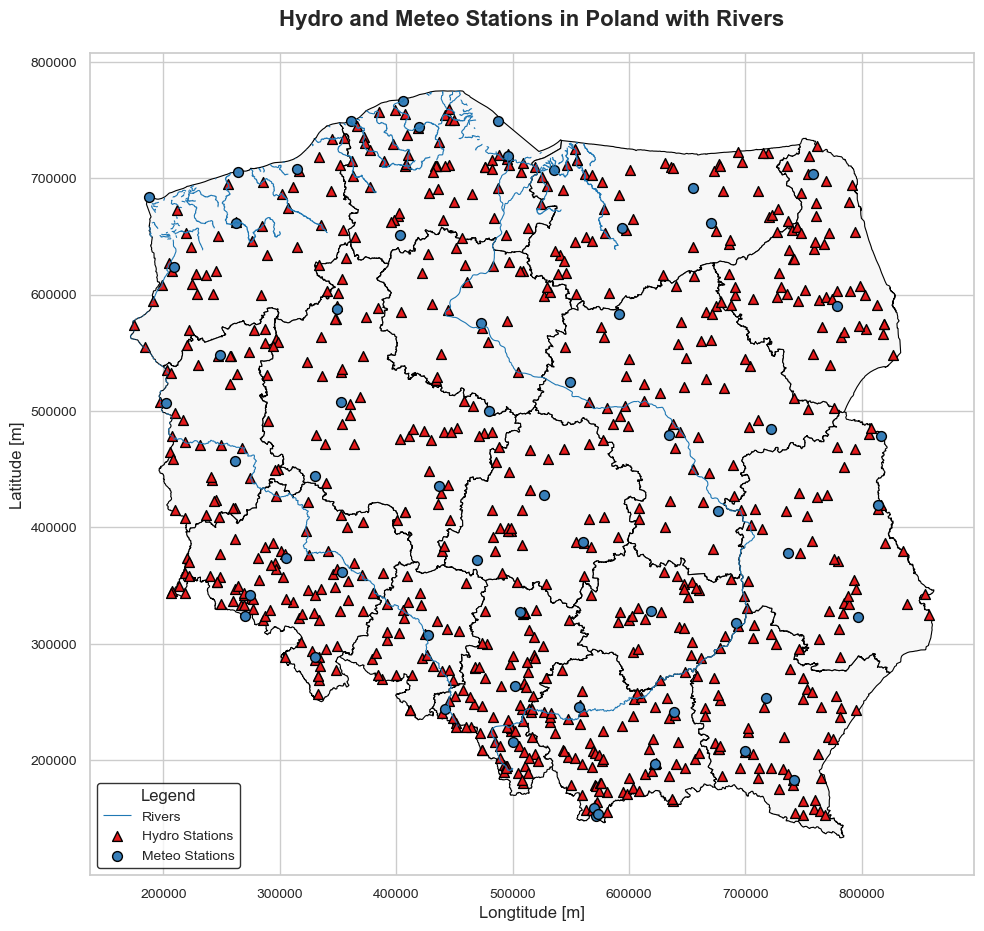

In [34]:
# Apply seaborn theme
sns.set_theme(style="whitegrid")

# Create figure and axis
fig, ax = plt.subplots(1, 1, figsize=(10, 10))

# Plot voivodeships
woj.plot(ax=ax, color="#f7f7f7", edgecolor="black", linewidth=0.8, label='Voivodeships')

# Plot rivers
rzeki.plot(ax=ax, color="#1f78b4", linewidth=0.8, label='Rivers')

# Plot hydro stations (triangles)
gdf_h.plot(ax=ax, color="#e41a1c", edgecolor="black", marker='^', markersize=50, label='Hydro Stations')

# Plot meteo stations (circles)
gdf_m.plot(ax=ax, color="#377eb8", edgecolor="black", marker='o', markersize=50, label='Meteo Stations')

# Title
ax.set_title("Hydro and Meteo Stations in Poland with Rivers", fontsize=16, fontweight='bold', pad=20)

# Axis labels with units
ax.set_xlabel("Longtitude [m]", fontsize=12)
ax.set_ylabel("Latitude [m]", fontsize=12)

# Customize ticks for readability
ax.tick_params(labelsize=10)

# Add legend
legend = ax.legend(loc='lower left', fontsize=10, frameon=True,
                   facecolor='white', edgecolor='black',
                   title='Legend', title_fontsize=12)

# Improve layout
plt.tight_layout()
plt.show()


/var/folders/z9/f473nv411j13cywwsnc_vt580000gn/T/ipykernel_18672/2452108411.py:27: UserWarning: Legend does not support handles for PatchCollection instances.
See: https://matplotlib.org/stable/tutorials/intermediate/legend_guide.html#implementing-a-custom-legend-handler
  legend = ax.legend(loc='lower left', fontsize=10, frameon=True,


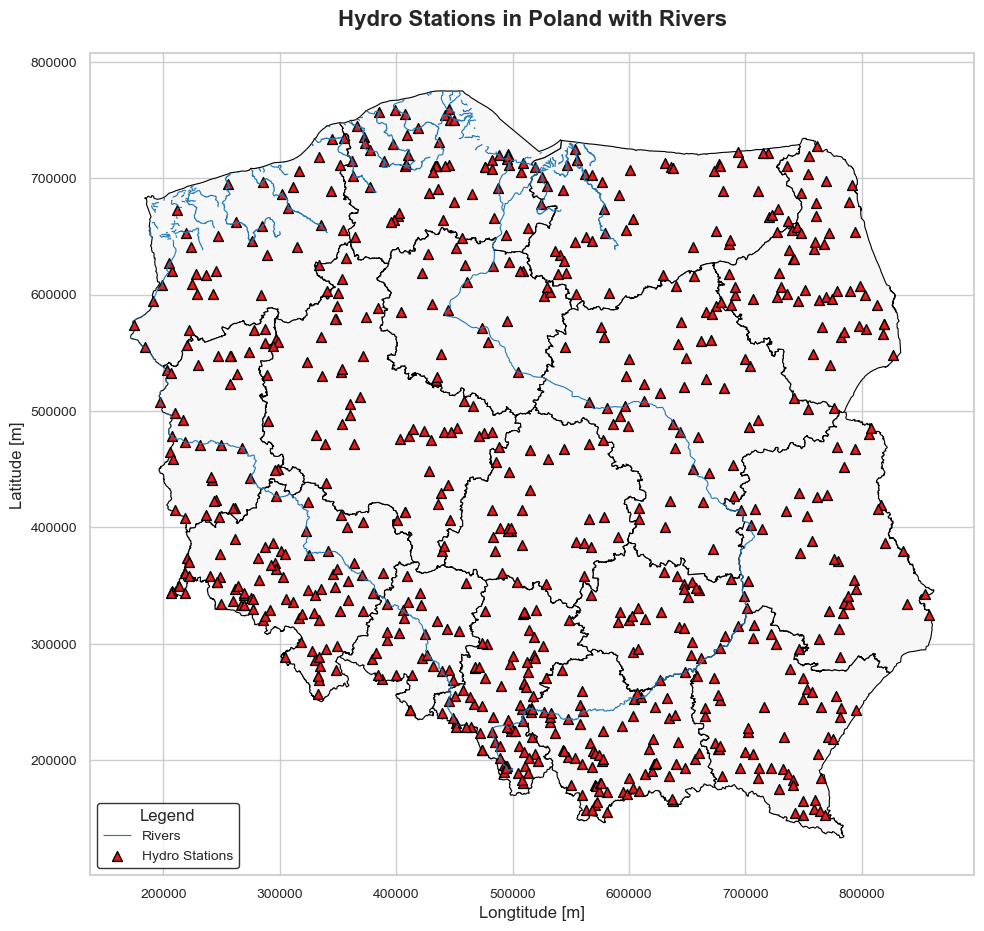

In [36]:
# Apply seaborn theme
sns.set_theme(style="whitegrid")

# Create figure and axis
fig, ax = plt.subplots(1, 1, figsize=(10, 10))

# Plot voivodeships
woj.plot(ax=ax, color="#f7f7f7", edgecolor="black", linewidth=0.8, label='Voivodeships')

# Plot rivers
rzeki.plot(ax=ax, color="#1f78b4", linewidth=0.8, label='Rivers')

# Plot hydro stations (triangles)
gdf_h.plot(ax=ax, color="#e41a1c", edgecolor="black", marker='^', markersize=50, label='Hydro Stations')

# Title
ax.set_title("Hydro Stations in Poland with Rivers", fontsize=16, fontweight='bold', pad=20)

# Axis labels with units
ax.set_xlabel("Longtitude [m]", fontsize=12)
ax.set_ylabel("Latitude [m]", fontsize=12)

# Customize ticks for readability
ax.tick_params(labelsize=10)

# Add legend
legend = ax.legend(loc='lower left', fontsize=10, frameon=True,
                   facecolor='white', edgecolor='black',
                   title='Legend', title_fontsize=12)

# Improve layout
plt.tight_layout()
plt.show()

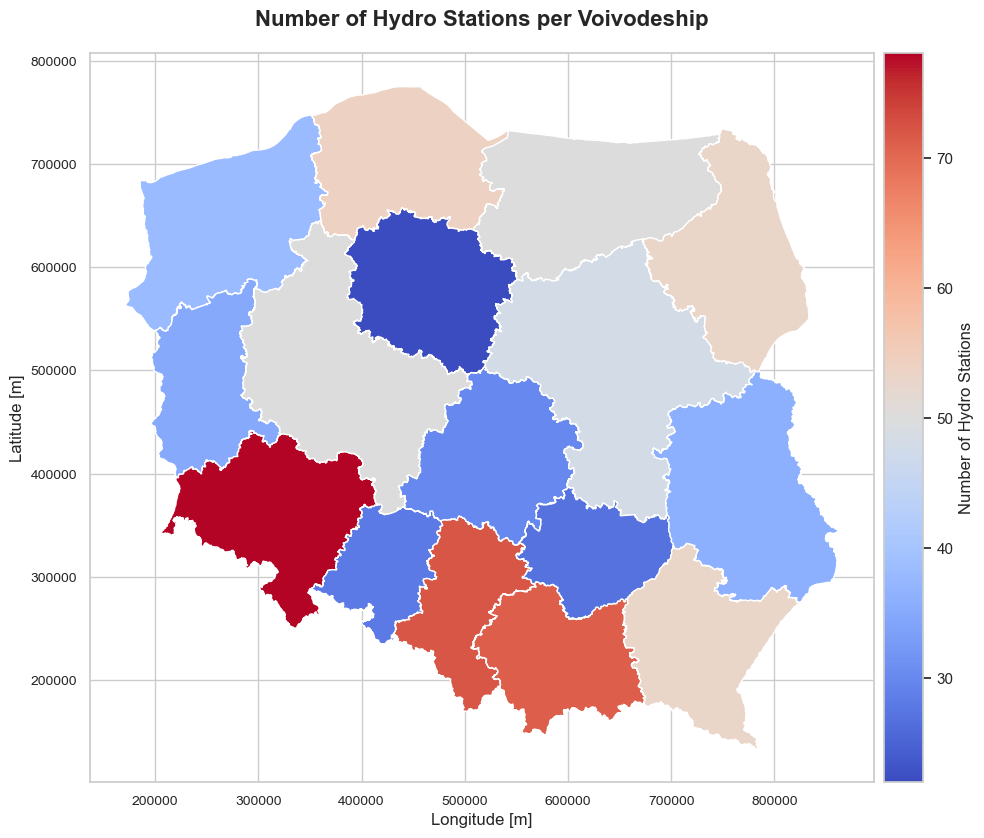

In [38]:
import matplotlib as mpl
from mpl_toolkits.axes_grid1 import make_axes_locatable

# The count of station per voivodeship
station_counts = gpd.sjoin(gdf_h, woj, how="inner", predicate='within')
counts_by_voivodeship_h = station_counts.groupby('JPT_NAZWA_').size()
woj['hydro_count'] = woj['JPT_NAZWA_'].map(counts_by_voivodeship_h)

sns.set_theme(style="whitegrid")

fig, ax = plt.subplots(1, 1, figsize=(10, 10))

# Plot the choropleth map
cmap = 'coolwarm'
column = 'hydro_count'
woj_plot = woj.plot(column=column, cmap=cmap, ax=ax, legend=False)

# Create a divider for colorbar placement
divider = make_axes_locatable(ax)
cax = divider.append_axes("right", size="5%", pad=0.1)

# Normalize values and create ScalarMappable
norm = mpl.colors.Normalize(vmin=woj[column].min(), vmax=woj[column].max())
sm = mpl.cm.ScalarMappable(cmap=cmap, norm=norm)
sm._A = []  # Hack to make colorbar work

# Create colorbar with 80% height
cb = plt.colorbar(sm, cax=cax, orientation="vertical")
cb.ax.set_position([cb.ax.get_position().x0,
                    cb.ax.get_position().y0 + 0.1,  # move up
                    cb.ax.get_position().width,
                    cb.ax.get_position().height * 0.8])  # scale height

cb.set_label('Number of Hydro Stations', fontsize=12)

# Title
ax.set_title("Number of Hydro Stations per Voivodeship", fontsize=16, fontweight='bold', pad=20)

# Axis labels
ax.set_xlabel("Longitude [m]", fontsize=12)
ax.set_ylabel("Latitude [m]", fontsize=12)
ax.tick_params(labelsize=10)

plt.tight_layout()
plt.show()

/var/folders/z9/f473nv411j13cywwsnc_vt580000gn/T/ipykernel_18672/1135224744.py:27: UserWarning: Legend does not support handles for PatchCollection instances.
See: https://matplotlib.org/stable/tutorials/intermediate/legend_guide.html#implementing-a-custom-legend-handler
  legend = ax.legend(loc='lower left', fontsize=10, frameon=True,


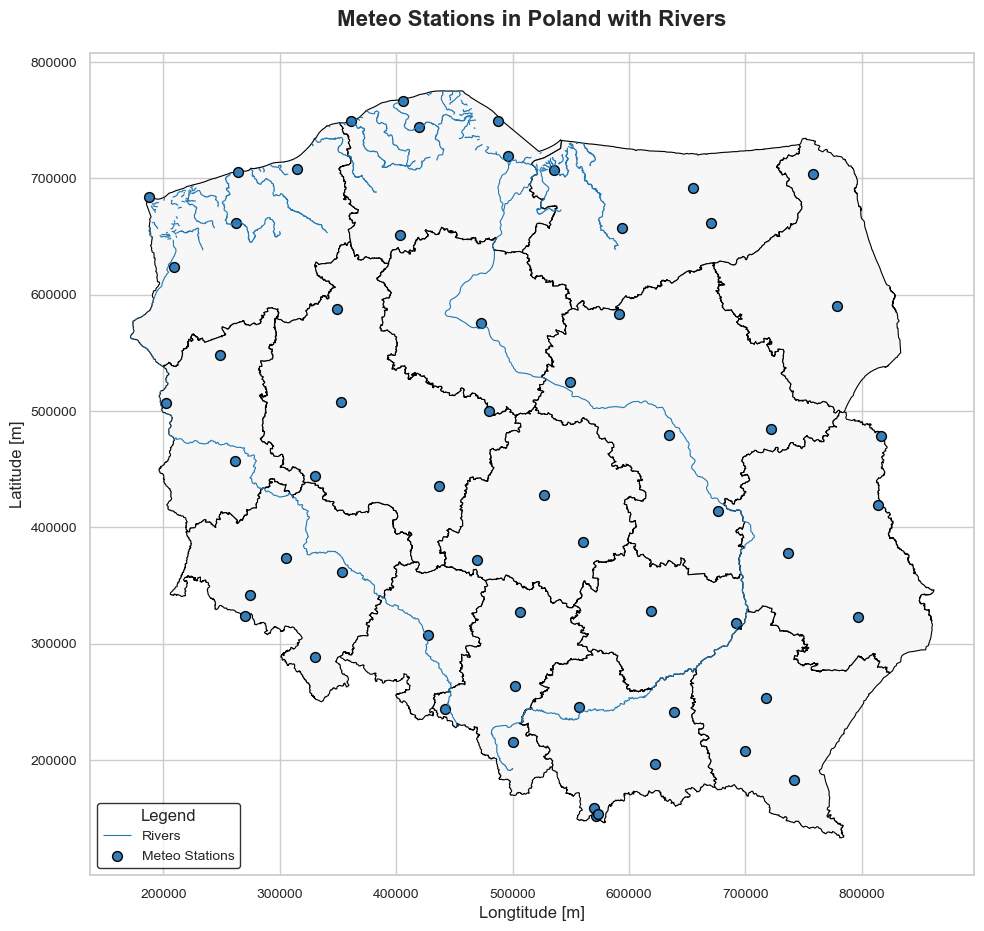

In [40]:
# Apply seaborn theme
sns.set_theme(style="whitegrid")

# Create figure and axis
fig, ax = plt.subplots(1, 1, figsize=(10, 10))

# Plot voivodeships
woj.plot(ax=ax, color="#f7f7f7", edgecolor="black", linewidth=0.8, label='Voivodeships')

# Plot rivers
rzeki.plot(ax=ax, color="#1f78b4", linewidth=0.8, label='Rivers')

# Plot hydro stations (triangles)
gdf_m.plot(ax=ax, color="#377eb8", edgecolor="black", marker='o', markersize=50, label='Meteo Stations')

# Title
ax.set_title("Meteo Stations in Poland with Rivers", fontsize=16, fontweight='bold', pad=20)

# Axis labels with units
ax.set_xlabel("Longtitude [m]", fontsize=12)
ax.set_ylabel("Latitude [m]", fontsize=12)

# Customize ticks for readability
ax.tick_params(labelsize=10)

# Add legend
legend = ax.legend(loc='lower left', fontsize=10, frameon=True,
                   facecolor='white', edgecolor='black',
                   title='Legend', title_fontsize=12)

# Improve layout
plt.tight_layout()
plt.show()

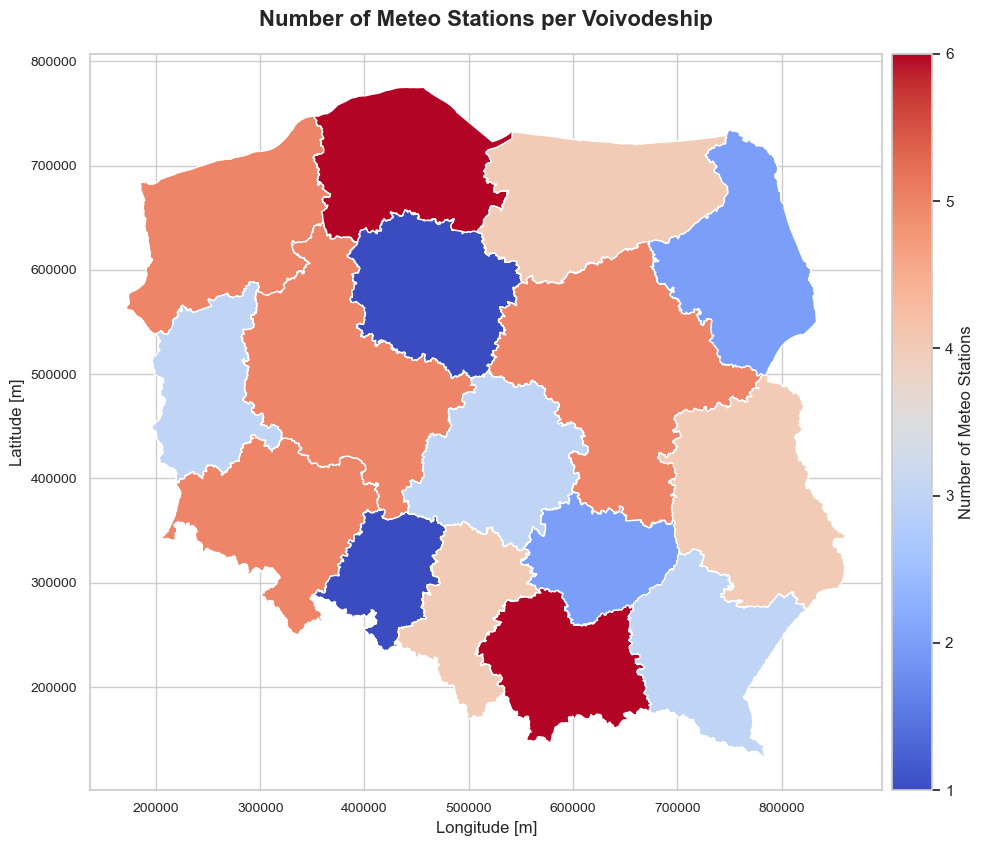

In [42]:
import matplotlib as mpl
from mpl_toolkits.axes_grid1 import make_axes_locatable

# The count of stations per voivodeship
station_counts = gpd.sjoin(gdf_m, woj, how="inner", predicate='within')
counts_by_voivodeship_m = station_counts.groupby('JPT_NAZWA_').size()
woj['meteo_count'] = woj['JPT_NAZWA_'].map(counts_by_voivodeship_m)
sns.set_theme(style="whitegrid")

fig, ax = plt.subplots(1, 1, figsize=(10, 10))

# Plot the choropleth map
cmap = 'coolwarm'
column = 'meteo_count'
woj_plot = woj.plot(column=column, cmap=cmap, ax=ax, legend=False)

# Create a divider for colorbar placement
divider = make_axes_locatable(ax)
cax = divider.append_axes("right", size="5%", pad=0.1)

# Normalize values and create ScalarMappable
norm = mpl.colors.Normalize(vmin=woj[column].min(), vmax=woj[column].max())
sm = mpl.cm.ScalarMappable(cmap=cmap, norm=norm)
sm._A = []  # Hack to make colorbar work

# Create colorbar with 80% height
cb = plt.colorbar(sm, cax=cax, orientation="vertical")
cb.ax.set_position([cb.ax.get_position().x0,
                    cb.ax.get_position().y0 + 0.1,  # move up
                    cb.ax.get_position().width,
                    cb.ax.get_position().height * 0.8])  # scale height

cb.set_label('Number of Meteo Stations', fontsize=12)

# Title
ax.set_title("Number of Meteo Stations per Voivodeship", fontsize=16, fontweight='bold', pad=20)

# Axis labels
ax.set_xlabel("Longitude [m]", fontsize=12)
ax.set_ylabel("Latitude [m]", fontsize=12)
ax.tick_params(labelsize=10)

plt.tight_layout()
plt.show()

In [44]:
# Set a threshold (in meters)
distance_threshold = 1000

# Compute the minimum distance from each station to the river network
gdf_h['min_dist_to_river'] = gdf_h.geometry.apply(lambda point: rzeki.distance(point).min())

# Filter only stations within threshold
stations_near_rivers = gdf_h[gdf_h['min_dist_to_river'] <= distance_threshold]

/var/folders/z9/f473nv411j13cywwsnc_vt580000gn/T/ipykernel_18672/466799980.py:27: UserWarning: Legend does not support handles for PatchCollection instances.
See: https://matplotlib.org/stable/tutorials/intermediate/legend_guide.html#implementing-a-custom-legend-handler
  legend = ax.legend(loc='lower left', fontsize=10, frameon=True,


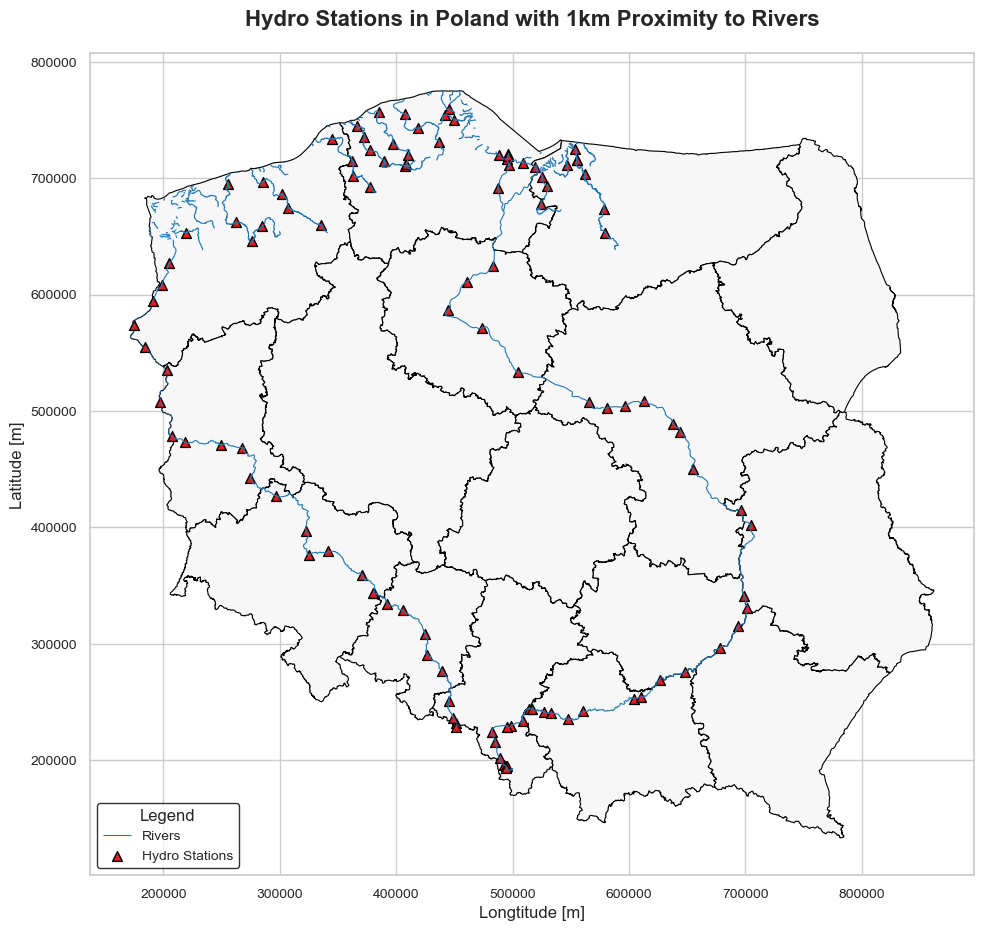

In [46]:
# Apply seaborn theme
sns.set_theme(style="whitegrid")

# Create figure and axis
fig, ax = plt.subplots(1, 1, figsize=(10, 10))

# Plot voivodeships
woj.plot(ax=ax, color="#f7f7f7", edgecolor="black", linewidth=0.8, label='Voivodeships')

# Plot rivers
rzeki.plot(ax=ax, color="#1f78b4", linewidth=0.8, label='Rivers')

# Plot hydro stations (triangles)
stations_near_rivers.plot(ax=ax, color="#e41a1c", edgecolor="black", marker='^', markersize=50, label='Hydro Stations')

# Title
ax.set_title("Hydro Stations in Poland with 1km Proximity to Rivers", fontsize=16, fontweight='bold', pad=20)

# Axis labels with units
ax.set_xlabel("Longtitude [m]", fontsize=12)
ax.set_ylabel("Latitude [m]", fontsize=12)

# Customize ticks for readability
ax.tick_params(labelsize=10)

# Add legend
legend = ax.legend(loc='lower left', fontsize=10, frameon=True,
                   facecolor='white', edgecolor='black',
                   title='Legend', title_fontsize=12)

# Improve layout
plt.tight_layout()
plt.show()